<a href="https://colab.research.google.com/github/pagadalaAnu/2203A52046_Deep-Learning/blob/main/2203A52046_DEEP_LEARNING_LAB_ASSOGNMNET_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Load the dataset
file_path = "/content/slr09.xls"
df = pd.read_excel(file_path, engine='xlrd') # or engine='openpyxl'

# Display the first few rows and columns to understand the structure
print(df.head())
print(df.columns) # Print the column names

# Normalize data
# Ensure the column names below match the actual column names in your dataframe
# You might need to adjust them based on the output of df.columns
df['X'] = (df['X'] - df['X'].mean()) / df['X'].std()  # Replace 'Previous_Week_Load' with the correct column name
df['Y'] = (df['Y'] - df['Y'].mean()) / df['Y'].std()  # Replace 'Current_Week_Load' with the correct column name

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
     X    Y
0  7.6  157
1  7.1  174
2  8.2  175
3  7.5  188
4  7.4  171
Index(['X', 'Y'], dtype='object')


In [ ]:
X = df['X'].values.reshape(-1, 1)
y = df['Y'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Initialize parameters
m, c = 1.0, -1.0  # Given in the problem
eta = 0.1  # Learning rate
epochs = 100  # Given in the problem

# Initialize squared gradient accumulators
G_m, G_c = 0, 0
epsilon = 1e-8  # To prevent division by zero

# Training loop
for epoch in range(epochs):
    grad_m, grad_c = 0, 0

    # Compute gradients
    for i in range(len(X_train)):
        xi = X_train[i]
        yi = y_train[i]
        pred = m * xi + c

        grad_m += -2 * (yi - pred) * xi
        grad_c += -2 * (yi - pred)

    # Update squared gradient sums
    G_m += grad_m**2
    G_c += grad_c**2

    # Update parameters using AdaGrad formula
    m -= (eta / (np.sqrt(G_m) + epsilon)) * grad_m
    c -= (eta / (np.sqrt(G_c) + epsilon)) * grad_c

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: m = {m}, c = {c}")


Epoch 0: m = [0.9], c = [-0.9]
Epoch 10: m = [0.51716331], c = [-0.52481472]
Epoch 20: m = [0.33052403], c = [-0.34862642]
Epoch 30: m = [0.20332446], c = [-0.23316236]
Epoch 40: m = [0.10907208], c = [-0.15129943]
Epoch 50: m = [0.03654076], c = [-0.09132783]
Epoch 60: m = [-0.02042923], c = [-0.04670167]
Epoch 70: m = [-0.06572309], c = [-0.01323979]
Epoch 80: m = [-0.10200991], c = [0.01193774]
Epoch 90: m = [-0.13122697], c = [0.03090276]


In [ ]:
# Predictions for train and test sets
y_train_pred = m * X_train + c
y_test_pred = m * X_test + c

# Compute error metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}")
print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}")


Train MSE: 0.8663143296049667, RMSE: 0.9307600816563668, MAE: 0.7899221248075965
Test MSE: 1.1060316235830032, RMSE: 1.0516803809061968, MAE: 0.8725036887336399


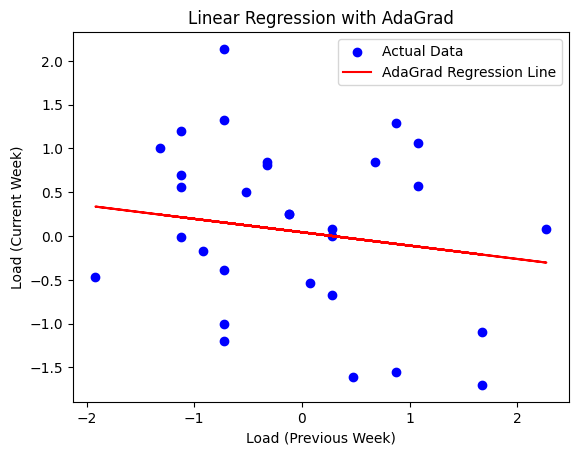

In [ ]:
plt.scatter(X_train, y_train, color="blue", label="Actual Data")
plt.plot(X_train, y_train_pred, color="red", label="AdaGrad Regression Line")
plt.xlabel("Load (Previous Week)")
plt.ylabel("Load (Current Week)")
plt.legend()
plt.title("Linear Regression with AdaGrad")
plt.show()
